# Entanglement generation and characterization using metamaterial resonators

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from numpy import *
from qutip import *
from IPython.display import Image
from numpy.linalg import *
import multiprocessing as mp
import scipy.constants as sc
import time
import datetime
import os
from matplotlib import cm
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
plt.rcParams['axes.linewidth'] = 1.5 #set the value globally
plt.rcParams['figure.dpi'] = 100

saveImages = False

## 1. Metamaterial Circuit Resonator

In [34]:
circuit_Impedance = 50  # Ohm
infrared_cutoff = 2 * pi * 5 * 1e9  # 5 GHz

capacitance_per_cell = (1 / (2 * infrared_cutoff * circuit_Impedance))
inductance_per_cell = (circuit_Impedance / (2 * infrared_cutoff))

print('Capacitance (C) = %.3f fF' % (capacitance_per_cell*1e15))
print('Inductance (L) = %.3f pH' % (inductance_per_cell*1e12))

Capacitance (C) = 318.310 fF
Inductance (L) = 795.775 pH


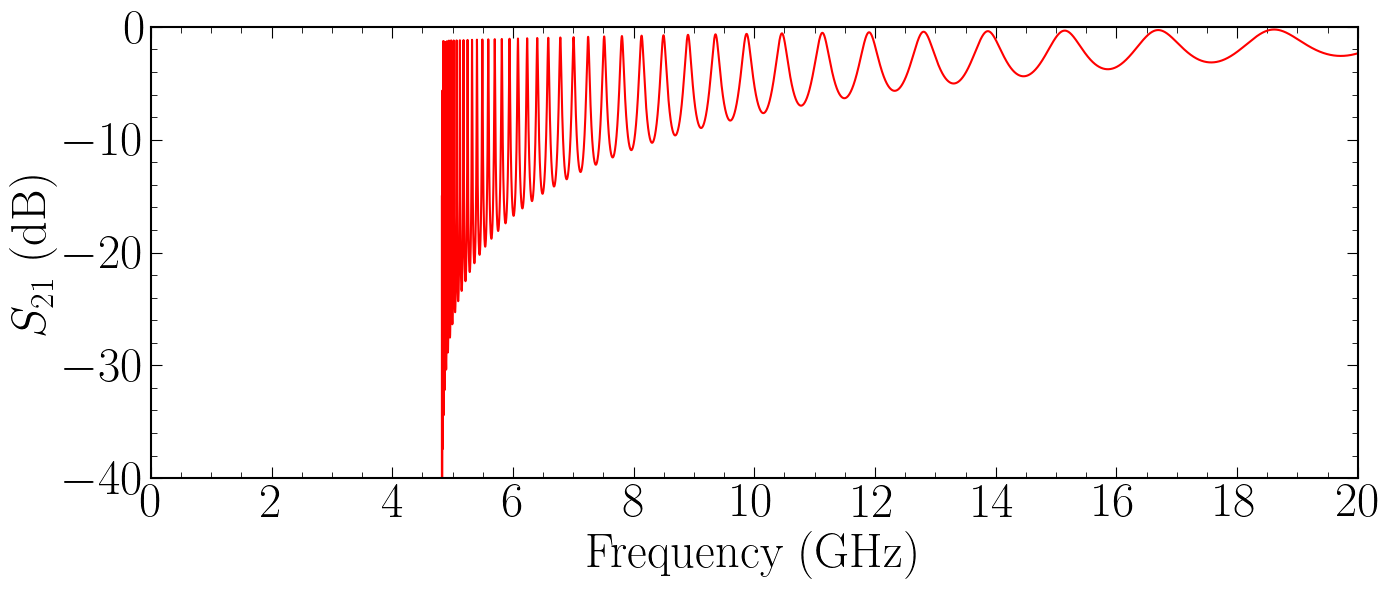

In [10]:
data_s21_artigo = loadtxt(r'Data/S21parameter_cutoff5GHz.txt')

x_list_s21artigo = data_s21_artigo[:,0]
y_list_s21artigo = data_s21_artigo[:,1]

fig, axes = plt.subplots(1, 1, figsize=(14, 6)) #14,7

axes.plot(x_list_s21artigo, y_list_s21artigo, color='red', linestyle='-', label=r'Delta', lw=1.5)

axes.set_xlabel(r'Frequency (GHz)', rotation=0, fontsize=35)
axes.set_ylabel(
    r'$S_{21}$ (dB)', rotation=90, fontsize=35)

axes.tick_params(axis='both', which='major', length = 8, direction='in', labelsize=35)
axes.tick_params(axis='both', which='minor', length = 4, direction='in', labelsize=35)
#axes.yaxis.tick_right()
axes.xaxis.set_ticks_position('both')
axes.yaxis.set_ticks_position('both')
#axes.legend(loc=2, fontsize=23, frameon=False)

#axes.set_xlim(0, 5778.04)
axes.set_ylim(-40, 0)
axes.set_xlim(0, 20)

start, end = axes.get_ylim()
axes.xaxis.set_ticks(arange(0, 20+1, 2))
axes.yaxis.set_ticks(arange(start, end+1, 10))

axes.xaxis.set_minor_locator(AutoMinorLocator())
axes.yaxis.set_minor_locator(AutoMinorLocator())

axes.set_ylim(-40, 0)
axes.set_xlim(0, 20)

#axes.text(0.5, -25, r"Forbidden band", color='black', fontsize=35, rotation=-45)
#axes.text(12, -25, r"LHTL band", color='red', fontsize=35, rotation=-45)

plt.margins(x=0.01, y=0.01)
plt.tight_layout()

if( saveImages == True):
    plt.savefig(r'Results/S21_simulacaoCST_artigo.png')
    plt.savefig(r'Results/S21_simulacaoCST_artigo.pdf')
plt.show()

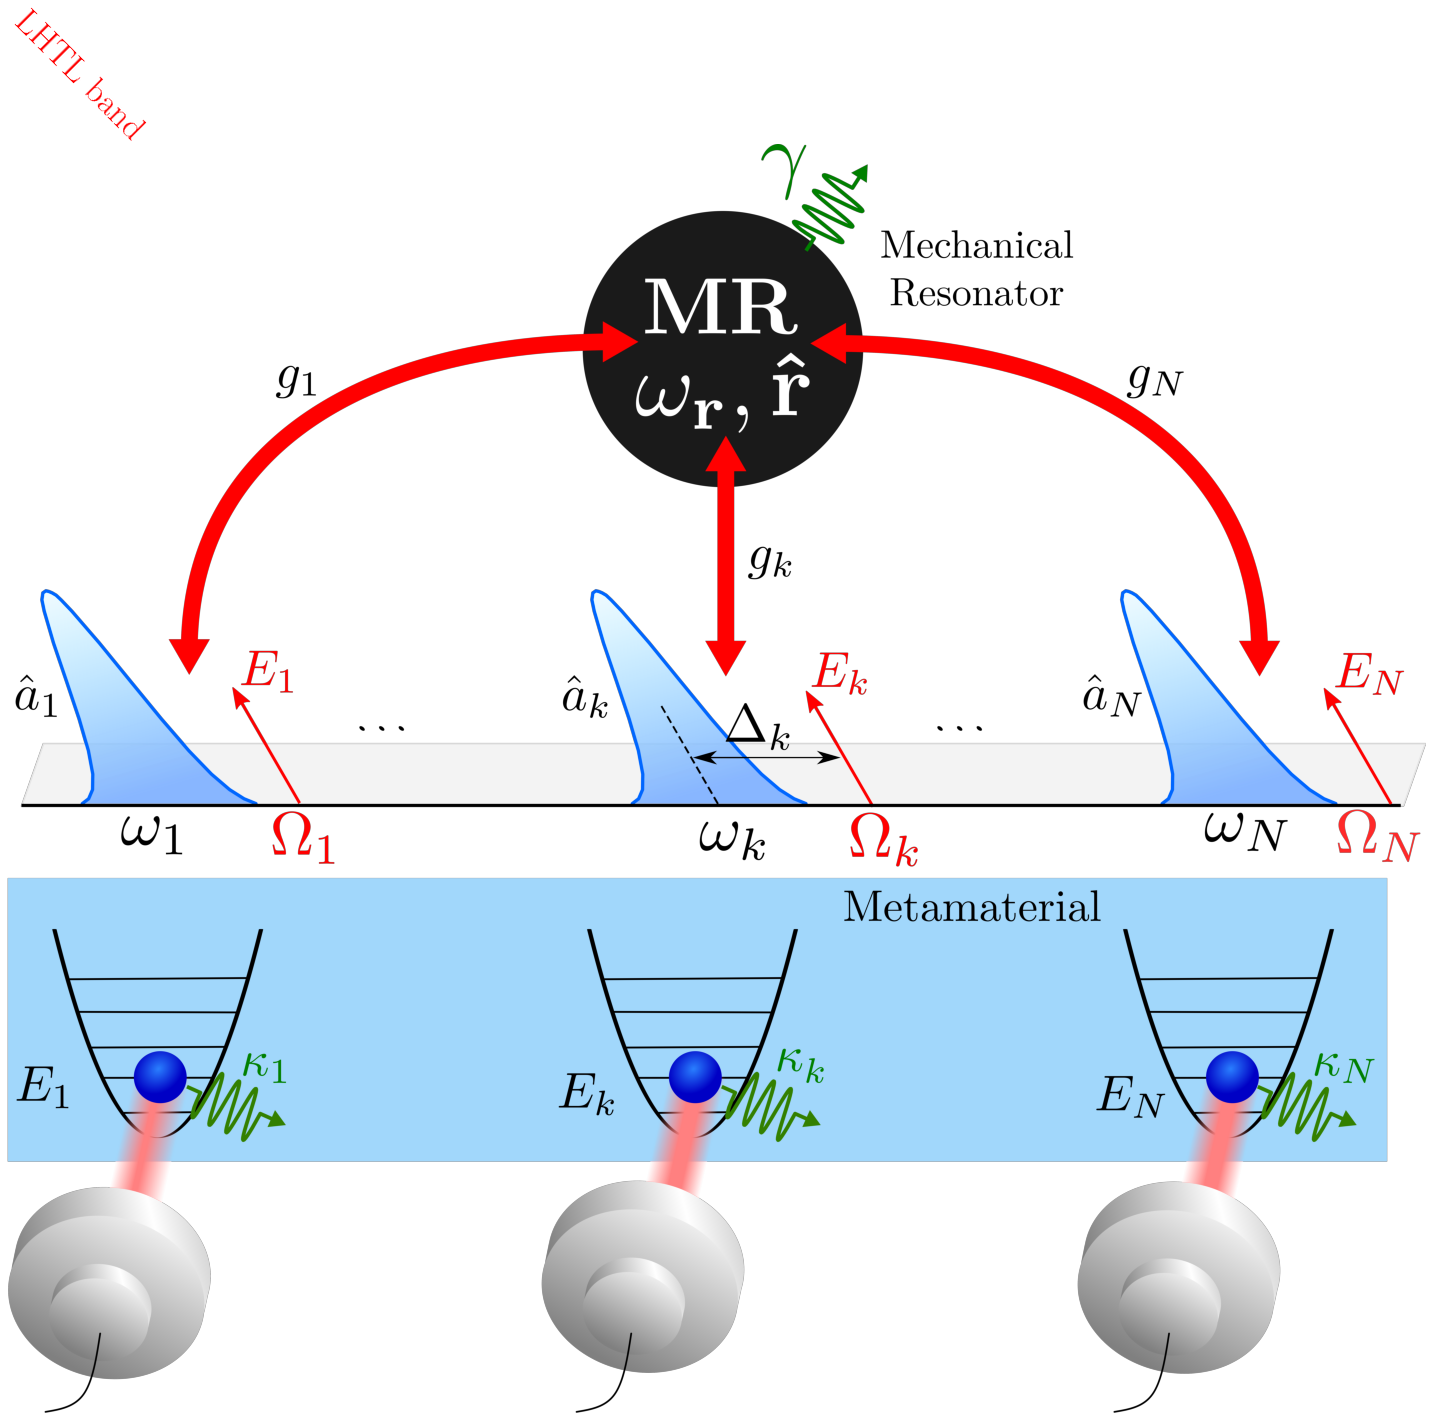

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axes = plt.subplots(1, 1, figsize=(20, 20))

img = mpimg.imread(r'Metamaterial_coupled_mechanical_resonator.png')

axes.text(12, -25, r"LHTL band", color='red', fontsize=35, rotation=-45)

plt.axis('off')
plt.imshow(img)
plt.tight_layout()
plt.savefig(r'Results/test.pdf')

plt.show()


In [ ]:
plt.tight_layout()

## 2. Dimension test

In [11]:
wr = 2 * pi * 20 * 1e6  # 100 MHz
T = 0.001                             # Temperature
w_th = (sc.k*T)/(sc.hbar)

# avg number of thermal bath excitation coupled to r
n_th_r = n_thermal(wr, w_th)
n_th_r

0.6206164576377909

In [12]:
thermal_dm(3, n_th_r)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.65376475 0.         0.        ]
 [0.         0.25035977 0.        ]
 [0.         0.         0.09587549]]

In [13]:
thermal_dm(4, n_th_r)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.63061147 0.         0.         0.        ]
 [0.         0.2414932  0.         0.        ]
 [0.         0.         0.09248003 0.        ]
 [0.         0.         0.         0.03541531]]

In [14]:
thermal_dm(5, n_th_r)


Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0.62217335 0.         0.         0.         0.        ]
 [0.         0.23826182 0.         0.         0.        ]
 [0.         0.         0.09124257 0.         0.        ]
 [0.         0.         0.         0.03494142 0.        ]
 [0.         0.         0.         0.         0.01338085]]

In [15]:
thermal_dm(6, n_th_r)

Quantum object: dims = [[6], [6]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[0.61900146 0.         0.         0.         0.         0.        ]
 [0.         0.23704714 0.         0.         0.         0.        ]
 [0.         0.         0.0907774  0.         0.         0.        ]
 [0.         0.         0.         0.03476328 0.         0.        ]
 [0.         0.         0.         0.         0.01331263 0.        ]
 [0.         0.         0.         0.         0.         0.00509808]]

In [16]:
thermal_dm(7, n_th_r)

Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = True
Qobj data =
[[0.61779533 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.23658525 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.09060052 0.         0.         0.
  0.        ]
 [0.         0.         0.         0.03469555 0.         0.
  0.        ]
 [0.         0.         0.         0.         0.01328669 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.00508815
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00194851]]

In [17]:
thermal_dm(20, n_th_r)

Quantum object: dims = [[20], [20]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[6.17049148e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.36299499e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.04910950e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00

In [18]:
thermal_dm(100, n_th_r)

Quantum object: dims = [[100], [100]], shape = (100, 100), type = oper, isherm = True
Qobj data =
[[6.17049145e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.36299498e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.04910946e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.26566108e-41
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  8.67636846e-42 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.32262272e-42]]

## 3. Simulation 1

In [19]:
g_size = 5
galist = 2 * pi * linspace(0, 15, g_size) * 1e6
gblist = 2 * pi * linspace(0, 15, g_size) * 1e6

wa = 2 * pi * 5.100 * 1e9  # 5.100 GHz
wb = 2 * pi * 5.150 * 1e9  # 5.150 GHz
wr = 2 * pi * 20 * 1e6  # 100 MHz

ohm_a_initial = wa - 2 * pi * 2.0 * 1e6  # -1500 kHz
ohm_a_final = wa + 2 * pi * 0.5 * 1e6  # 500 kHz

ohm_a_list = linspace(ohm_a_initial, ohm_a_final, 200)

#Delta_a_list = 2 * pi * linspace(-2000, 500, 180) *1e3
#Delta_b_list = 2 * pi * linspace(-2000, 500, 180) *1e3

Delta_a_list_1 = 2 * pi * linspace(-20, 5, 300) *1e6
Delta_a_list_2 = 2 * pi * linspace(5, 15, 20) *1e6
Delta_a_list_3 = 2 * pi * linspace(15, 20, 80) *1e6
Delta_a_list_4 = 2 * pi * linspace(20, 30, 20) *1e6
#Delta_a_list_5 = 2 * pi * linspace(20, 40, 20) *1e6

Delta_a_list = concatenate((Delta_a_list_1,Delta_a_list_2, Delta_a_list_3, Delta_a_list_4))

#Delta_a_list = 2 * pi * linspace(-20, 20, 500) *1e6
Delta_b_list = 2 * pi * linspace(-20, 20, 200) *1e6

# Dissipation rates
kappa_a = 2 * pi * 80 * 1e3   # 100 kHz
kappa_b = 2 * pi * 50 * 1e3   # 100 kHz

gamma = 10 * kappa_a          # 10 MHz

T = 0                              # Temperature
w_th = (sc.k*T)/(sc.hbar)

# avg number of thermal bath excitation coupled to r
n_th_r = n_thermal(wr, w_th)

# Operators
N = 3
dimFock_cav = 3
dimFock_mech = 5
a = tensor(destroy(N), qeye(N), qeye(N))
b = tensor(qeye(N), destroy(N), qeye(N))
r = tensor(qeye(N), qeye(N), destroy(N))
Na = a.dag() * a
Nb = b.dag() * b
Nr = r.dag() * r
Xa = a.dag() + a
Xb = b.dag() + b
Xr = r.dag() + r

A_xy_list = []
A_xy_list_2 = []
B_xy_list = []
Na_xy_list = []
Nb_xy_list = []

pA0_xy_list = []
pA1_xy_list = []
pA2_xy_list = []

pB0_xy_list = []
pB1_xy_list = []
pB2_xy_list = []

S_plus_xy_list = []
S_minus_xy_list = []
reS_plus_xy_list = []
reS_minus_xy_list = []
imS_plus_xy_list = []
imS_minus_xy_list = []
neg_xy_list = []

DeltaE_xy_list = []
T_xy_list = []

for k in range(len(galist)):

    # Field operators
    a_list = []
    b_list = []
    Na_list = []
    Nb_list = []
    a_list_2 = []

    # Entanglement
    S_plus_list = []
    S_minus_list = []
    DeltaE_list = []
    T_list = []
    reS_plus_list = []
    reS_minus_list = []
    imS_plus_list = []
    imS_minus_list = []
    neg_list = []

    # Populations
    pA_0_list = []
    pB_0_list = []
    pA_1_list = []
    pB_1_list = []
    pA_2_list = []
    pB_2_list = []

    for i in range(len(Delta_a_list)):

        ga = galist[k]
        gb = 2 * pi * 5 * 1e6          # Fixed at 5 MHz

        chiA = ((ga**2)/wr)
        chiB = ((gb**2)/wr)
        chiAB = ((gb*ga)/wr)

        E_a = 2 * pi * 40 * 1e3
        #Ohm_a = ohm_a_list[i]
        Delta_a = Delta_a_list[i]

        E_b = 2 * pi * 40 * 1e3
        Ohm_b = wb - chiB  # 0.9999294416838251 * wb
        Delta_b = -((gb**2)/wr)

        #Ha = (wa - Ohm_a) * Na
        #Hb = (wb - Ohm_b) * Nb
        Ha = -Delta_a * Na
        Hb = -Delta_b * Nb
        Hr = wr * Nr
        Hint_a = -ga * Na * Xr
        Hint_b = -gb * Nb * Xr
        Hdrive_a = E_a * Xa
        Hdrive_b = E_b * Xb
        
        H = Ha + Hb + Hr + Hint_a + Hint_b + Hdrive_a + Hdrive_b

        c_ops = []
        rate = kappa_a
        if rate > 0.0:
            c_ops.append(sqrt(rate) * a)

        rate = kappa_b
        if rate > 0.0:
            c_ops.append(sqrt(rate) * b)

        rate = gamma * (1 + n_th_r)
        if rate > 0.0:
            c_ops.append(sqrt(rate) * r)

        #rate = gamma * n_th_r
        # if rate > 0.0:
        #    c_ops.append(sqrt(rate) * r.dag())

        rho_ss = steadystate(H, c_ops)
        chi_ss = rho_ss - tensor(ptrace(rho_ss, (0)),
                                 ptrace(rho_ss, (1)), ptrace(rho_ss, (2)))

        #S_plus_matrix  = chi_ss * b.dag() * b * a.dag()
        #S_minus_matrix = chi_ss * b.dag() * b * a

        #S_plus  = (2* ga * gb / wr) * S_plus_matrix.tr()
        #S_minus = (2* ga * gb / wr) * S_minus_matrix.tr()

        S_plus = (2 * ga * gb / wr) * expect(b.dag() * b * a.dag(), chi_ss)
        S_minus = (2 * ga * gb / wr) * expect(b.dag() * b * a, chi_ss)
        Tx = (ga * gb / wr) * expect(Na * Nb, chi_ss)

        T_list.append(Tx)
        S_plus_list.append(abs(S_plus))
        S_minus_list.append(abs(S_minus))

        reS_plus_list.append(real(S_plus))
        reS_minus_list.append(real(S_minus))

        imS_plus_list.append(imag(S_plus))
        imS_minus_list.append(imag(S_minus))

        a_ss = expect(a, rho_ss)
        #a_ss = (rho_ss * a).tr()
        b_ss = expect(b, rho_ss)

        aada = expect(a * a.dag() * a, rho_ss)
        #adada = expect(a.dag() * a.dag() * a, rho_ss)
        #bbdb = expect(b * b.dag() * b, rho_ss)

        pol_arg = (r.dag() - r) * ((ga/wr) * Na + (gb/wr) * Nb)
        pol = pol_arg.expm()
        #pol_arg_half = (pol_arg / 2)
        #pol_half = pol_arg_half.expm()

        na_ss = expect(Na, rho_ss)
        na2_ss = expect(Na**2, rho_ss)
        nb_ss = expect(Nb, rho_ss)

        DeltaE = -(ga**2/wr) * na2_ss - (ga * gb / wr) * na_ss * nb_ss - Tx
        DeltaE_list.append(DeltaE)

        rho_p = pol * rho_ss * pol.dag()

        a_ss_2 = (E_a + ga * (rho_p * a * Xr).tr() + (2 * ga**2 / wr) * aada + S_minus) / ((-ga**2 / wr) + 1j * (kappa_a/2) - 2 * chiAB * nb_ss - Delta_a)
        a_list_2.append(a_ss_2)

        a_list.append(a_ss)
        b_list.append(b_ss)

        Na_list.append(abs(na_ss))
        Nb_list.append(abs(nb_ss))

        rhoAB = ptrace(rho_ss, (0, 1))
        rhoA = ptrace(rhoAB, (0))
        rhoB = ptrace(rhoAB, (1))

        # Ground state
        p0A = (fidelity(rhoA, fock(N, 0)))**2
        p0B = (fidelity(rhoB, fock(N, 0)))**2
        # First excited state
        p1A = (fidelity(rhoA, fock(N, 1)))**2
        p1B = (fidelity(rhoB, fock(N, 1)))**2
        # Second excited state
        p2A = (fidelity(rhoA, fock(N, 2)))**2
        p2B = (fidelity(rhoB, fock(N, 2)))**2

        pA_0_list.append(p0A)
        pB_0_list.append(p0B)
        pA_1_list.append(p1A)
        pB_1_list.append(p1B)
        pA_2_list.append(p2A)
        pB_2_list.append(p2B)

        neg = negativity(rhoAB, 0, method='eigenvalues')
        neg_list.append(neg)

    #fig, axes = plt.subplots(1,1, figsize=(10,7))

    absA_list = [abs(k) for k in a_list]
    absA_list_2 = [abs(k) for k in a_list_2]
    absB_list = [abs(k) for k in b_list]
    x_list = [(k-wa) / (2*pi*1e3) for k in ohm_a_list]

    #maxA_2 = max(absA_list_2)

    #absA_list_norm_2 = [k / maxA_2  for k in absA_list_2]

    #axes.plot(x_list,absA_list,label=r'$\langle \hat{a} \rangle$', lw=2.0)
    #axes.plot(x_list,absB_list,label=r'$\langle \hat{b} \rangle$', lw=2.0)
    #axes.plot(x_list,Na_list,label=r'$\vert\langle \hat{a}^\dagger\hat{a} \rangle\vert$', lw=2.0)
    #axes.plot(x_list,Nb_list,label=r'$\langle \hat{b}^\dagger\hat{b} \rangle\vert$', lw=2.0)

    #xposition = [-chiA/ (2*pi*1e3),-chiA/ (2*pi*1e3)-chiAB/ (2*pi*1e3)]
    #plt.axvline(x=xposition[0], color='blue', linestyle='--')
    #plt.axvline(x=xposition[1], color='red', linestyle='--')

    #axes.set_xlabel(r'$\omega_a - \omega_a^d$ (kHz)',rotation=0,fontsize= 20.0)
    #axes.set_ylabel(r'$\langle \hat{a}\rangle$',rotation=90,fontsize= 22.0)
    #axes.tick_params(axis='both', which='major', labelsize=16)
    #axes.tick_params(axis='both', which='minor', labelsize=16)
    # axes.legend(loc=1,fontsize=16)

    A_xy_list.append(absA_list)
    A_xy_list_2.append(absA_list_2)
    B_xy_list.append(absB_list)
    Na_xy_list.append(Na_list)
    Nb_xy_list.append(Nb_list)

    pA0_xy_list.append(pA_0_list)
    pA1_xy_list.append(pA_1_list)
    pA2_xy_list.append(pA_2_list)

    pB0_xy_list.append(pB_0_list)
    pB1_xy_list.append(pB_1_list)
    pB2_xy_list.append(pB_2_list)

    S_plus_xy_list.append(S_plus_list)
    S_minus_xy_list.append(S_minus_list)
    reS_plus_xy_list.append(reS_plus_list)
    reS_minus_xy_list.append(reS_minus_list)
    imS_plus_xy_list.append(imS_plus_list)
    imS_minus_xy_list.append(imS_minus_list)
    neg_xy_list.append(neg_list)

    DeltaE_xy_list.append(DeltaE_list)
    T_xy_list.append(T_list)

    print('%d/12' % k)


0/12
1/12
2/12
3/12
4/12


In [20]:
chi_ss = rho_ss - tensor(ptrace(rho_ss, (0)), ptrace(rho_ss, (1)), ptrace(rho_ss, (2)))
chi_ss.tr()

-4.718945805596573e-13

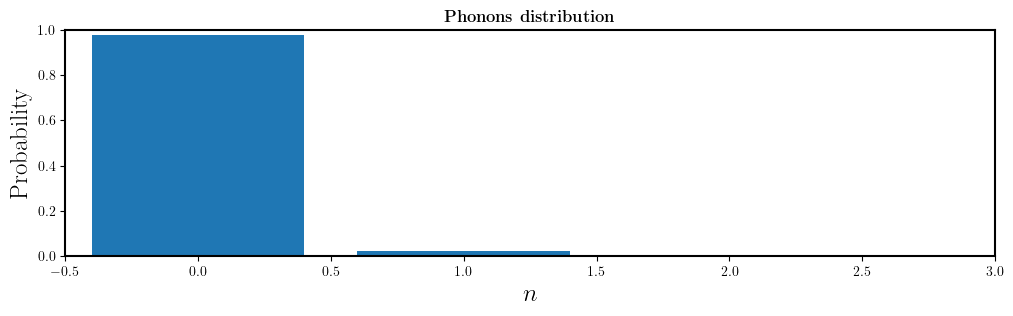

In [21]:
rhoR = ptrace(rho_ss, (2))

fig, axes = plt.subplots(1, 1, figsize=(12, 3))

axes.bar(arange(0, N), rhoR.diag())
axes.set_title("\\textbf{Phonons distribution}")
axes.set_xlim([-.5, N])
axes.set_ylim([0, 1])
axes.set_xlabel(r"$n$", fontsize=18)
axes.set_ylabel(r"Probability", fontsize=18)
#axes.text(1, .75, r"$$e^{-\vert\alpha\vert^2}\frac{\alpha^{2n}}{n!}$$", fontsize=14)
plt.show()

In [ ]:
rhoR = ptrace(rho_ss, (2))

fig, axes = plt.subplots(1, 1, figsize=(12, 3))

axes.bar(arange(0, N), rhoR.diag())
axes.set_title("\\textbf{Phonons distribution}")
axes.set_xlim([-.5, N])
axes.set_ylim([0, 1])
axes.set_xlabel(r"$n$", fontsize=18)
axes.set_ylabel(r"Probability", fontsize=18)
#axes.text(1, .75, r"$$e^{-\vert\alpha\vert^2}\frac{\alpha^{2n}}{n!}$$", fontsize=14)
plt.show()

In [ ]:
rhoR = ptrace(rho_ss, (2))

fig, axes = plt.subplots(1, 1, figsize=(12, 3))

axes.bar(arange(0, N), rhoR.diag())
axes.set_title("\\textbf{Phonons distribution}")
axes.set_xlim([-.5, N])
axes.set_ylim([0, 1])
axes.set_xlabel(r"$n$", fontsize=18)
axes.set_ylabel(r"Probability", fontsize=18)
#axes.text(1, .75, r"$$e^{-\vert\alpha\vert^2}\frac{\alpha^{2n}}{n!}$$", fontsize=14)
plt.show()

In [22]:
import MyFunctions